In [1]:
# import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


LOADING THE DATASET

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
#to print 5 columns of data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# to display stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no. of samples on each dataset
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

PREPROCESSING THE DATASET

In [7]:
# to check for the null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

EXPLORATORY DATA ANALYSIS

<Axes: >

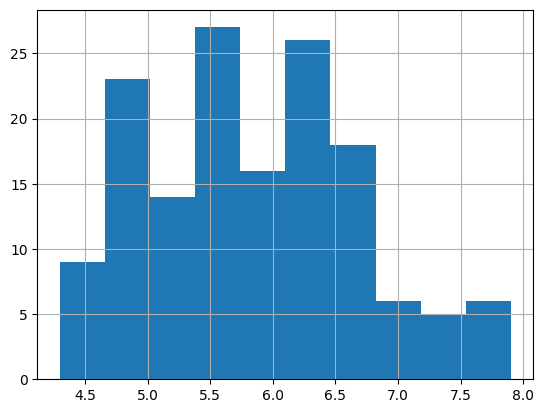

In [9]:
# histograms
df['sepal_length'].hist()

<Axes: >

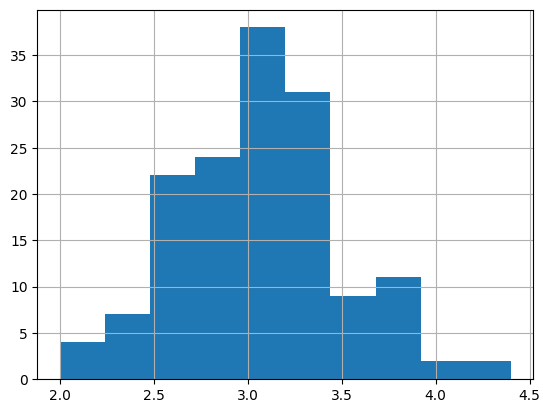

In [10]:
df['sepal_width'].hist()

<Axes: >

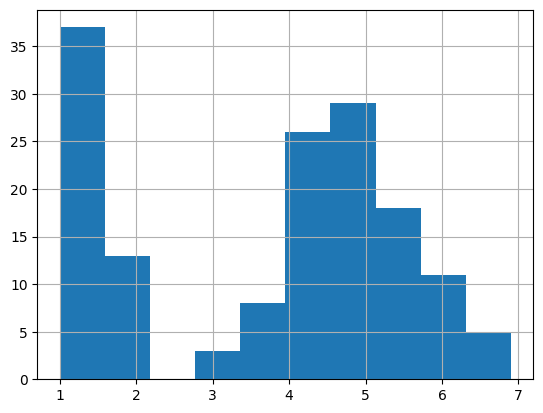

In [11]:
df['petal_length'].hist()

<Axes: >

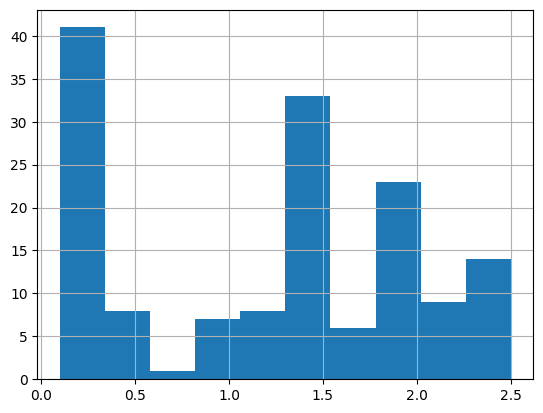

In [12]:
df['petal_width'].hist()

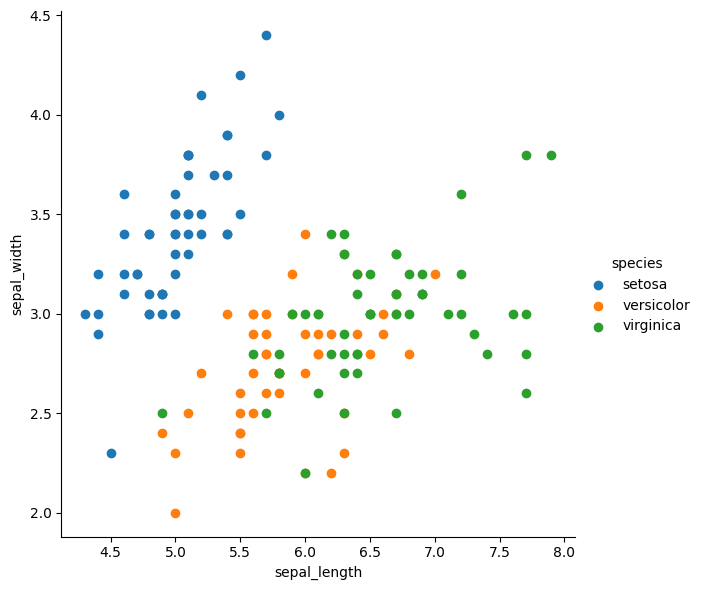

In [13]:
#scatterplots
sns.FacetGrid(df,hue='species',height=6).map(plt.scatter,"sepal_length","sepal_width").add_legend()

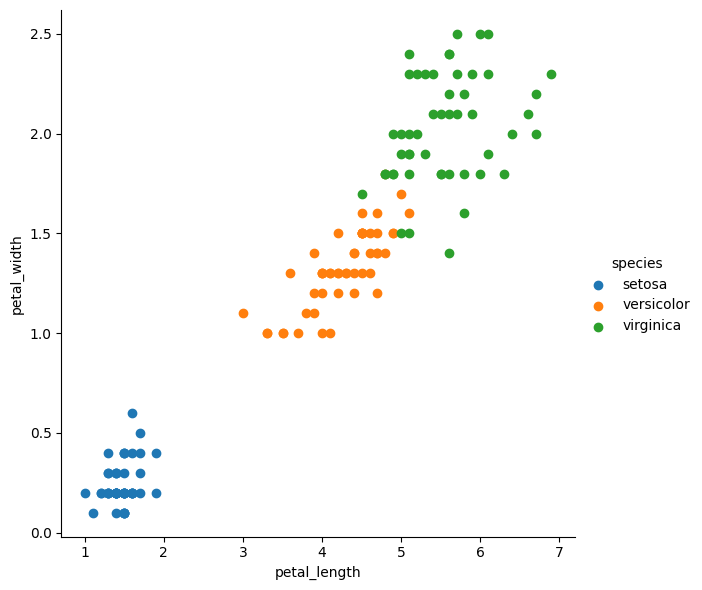

In [14]:
sns.FacetGrid(df,hue='species',height=6).map(plt.scatter,"petal_length","petal_width").add_legend()

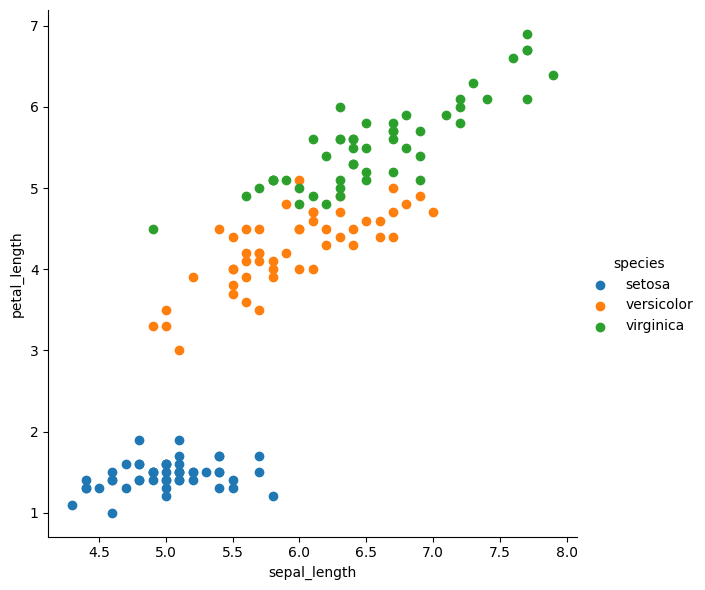

In [15]:
sns.FacetGrid(df,hue='species',height=6).map(plt.scatter,"sepal_length","petal_length").add_legend()

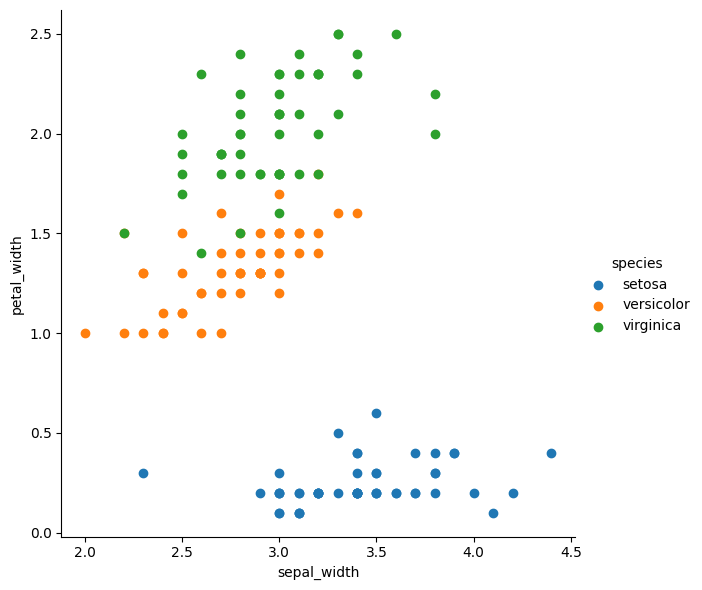

In [16]:
sns.FacetGrid(df,hue='species',height=6).map(plt.scatter,"sepal_width","petal_width").add_legend()

In [17]:
flower_mapping = {'setosa': 0 ,'versicolor': 1 , 'virginica': 2}
df['species'] = df['species'].map(flower_mapping)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


CORRELATION MATRIX

In [18]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

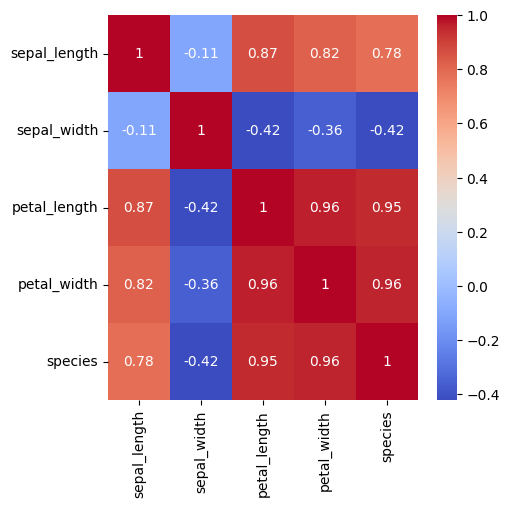

In [19]:
corr = df.corr()
fig , ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot=True,ax=ax, cmap = 'coolwarm')

LABEL ENCODER

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MODEL TRAINING

In [22]:
from sklearn.model_selection import train_test_split
# X = 70
# Y = 30
X = df.drop(columns = ['species'])
Y = df['species']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

In [23]:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

LogisticRegression()

In [25]:
# print metrics to get performance
print("Accuracy:", model.score(X_test,Y_test)*100)

Accuracy: 97.77777777777777


In [26]:
# knn = k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [27]:

model.fit(X_train,Y_train)

KNeighborsClassifier()

In [28]:
# print metrics to get performance
print("Accuracy:", model.score(X_test,Y_test)*100)

Accuracy: 93.33333333333333


In [29]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [30]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [31]:
# print metrics to get performance
print("Accuracy:", model.score(X_test,Y_test)*100)

Accuracy: 95.55555555555556
